![elements of data science](https://www.kdnuggets.com/wp-content/uploads/Fig1-Abisiga-top-10-lists-data-science.jpg)

![workflow of DS](https://images.squarespace-cdn.com/content/v1/55498133e4b0f65d7d6e1c4a/1539895492184-T982116JOKNIGZ7YEVO8/ke17ZwdGBToddI8pDm48kJK4Mm1kch8SFO9ZNkN1NT97gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QHyNOqBUUEtDDsRWrJLTmFk_H6M1tkD9NpL7mXac0oVSXdFfjxR5AjcLwGSebOiGBsFzzcw3xKxvyC_6CFFG_/Data+Science+Workflow.jpg)

![elements of AI](https://niviki.com/wp-content/uploads/2018/05/ai-machine-learning-deep-learning.png)

![types of ML](https://i.ibb.co/Pj9YT8w/ml-ds-algos.jpg)

# Probability of default: credit scoring model

This model uses a Kaggle dataset containing data about credit repayment difficulty rates among customers.

**Kaggle description:**

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. 

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers.

---

The variables are the following:

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse (Target variable / label)

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

---

We will be using a random forest classifier for two reasons: firstly, because it would allow us to quickly and easily change the output to a simple binary classification problem. Secondly, because the predict_proba functionality allows us to output a probability score (probability of 1), this score is what we will use for predicting the probability of 90 days past due delinquency or worse in 2 years time.

---

Furthermore, we will predominantly be adopting a quantiles based approach in order to streamline the process as much as possible so that hypothetical credit checks can be returned as easily and as quickly as possible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('cs-training.csv')
df.drop(columns=df.columns[0], inplace=True)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Exploration/ Visualization

In [8]:
df.SeriousDlqin2yrs.unique()

array([1, 0])

### Imbalance data

Extreme values

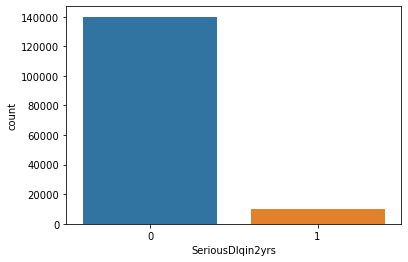

In [10]:
sns.countplot(x=df.SeriousDlqin2yrs);

In [11]:
from collections import Counter

In [12]:
Counter(df.SeriousDlqin2yrs)

Counter({1: 10026, 0: 139974})

In [14]:
10026/df.shape[0] * 100

6.683999999999999

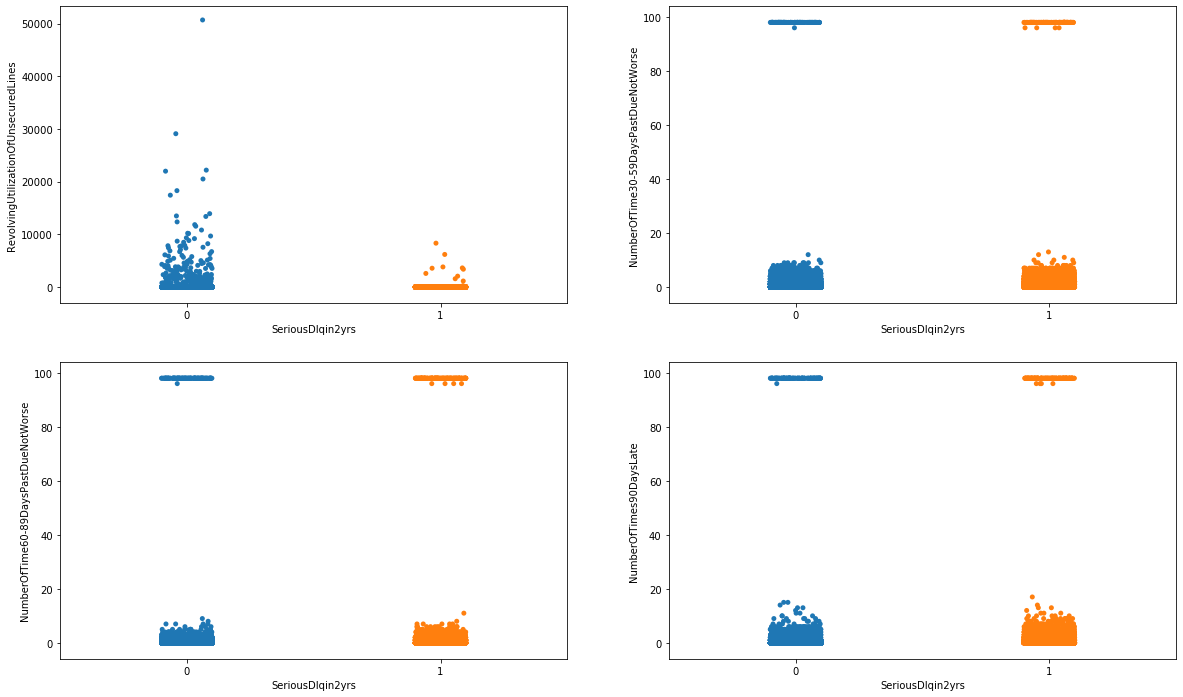

In [22]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(20)
fig.set_figheight(12)

sns.stripplot(x='SeriousDlqin2yrs', y='RevolvingUtilizationOfUnsecuredLines', data=df, ax=axes[0, 0])
sns.stripplot(x='SeriousDlqin2yrs', y='NumberOfTime30-59DaysPastDueNotWorse', data=df, ax=axes[0, 1])
sns.stripplot(x='SeriousDlqin2yrs', y='NumberOfTime60-89DaysPastDueNotWorse', data=df, ax=axes[1, 0])
sns.stripplot(x='SeriousDlqin2yrs', y='NumberOfTimes90DaysLate', data=df, ax=axes[1, 1]);

In [23]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

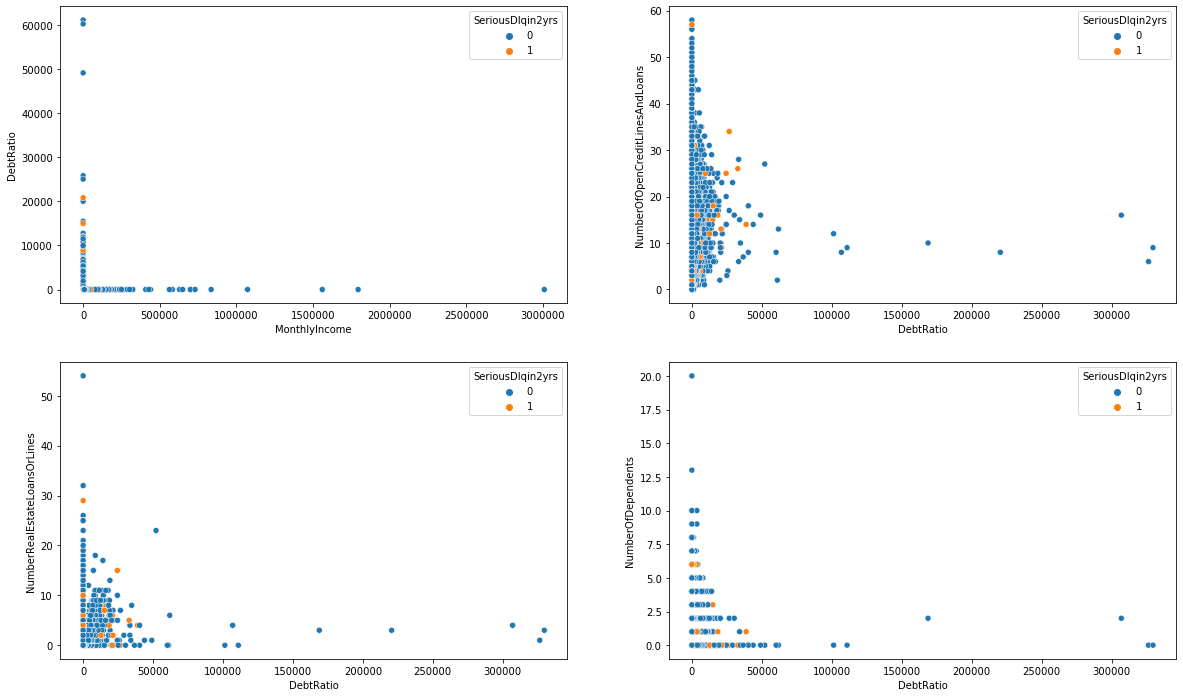

In [27]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(20)
fig.set_figheight(12)

sns.scatterplot(x='MonthlyIncome', y='DebtRatio', hue='SeriousDlqin2yrs', data=df, ax=axes[0, 0])
sns.scatterplot(x='DebtRatio', y='NumberOfOpenCreditLinesAndLoans', hue='SeriousDlqin2yrs', data=df, ax=axes[0, 1])
sns.scatterplot(x='DebtRatio', y='NumberRealEstateLoansOrLines', hue='SeriousDlqin2yrs', data=df, ax=axes[1, 0])
sns.scatterplot(x='DebtRatio', y='NumberOfDependents', hue='SeriousDlqin2yrs', data=df, ax=axes[1, 1]);

## Cleaning

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [30]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [31]:
df[df.MonthlyIncome.isna()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [32]:
29731/df.shape[0] * 100

19.820666666666668

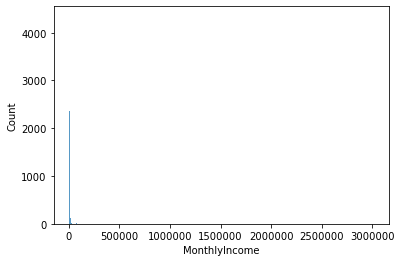

In [38]:
sns.histplot(data=df, x='MonthlyIncome');

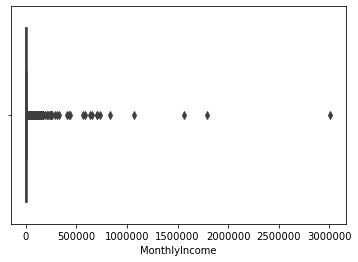

In [40]:
sns.boxplot(data=df, x='MonthlyIncome');

In [41]:
df.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [42]:
df.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [44]:
values = {'MonthlyIncome': df.MonthlyIncome.mean(), 'NumberOfDependents': df.NumberOfDependents.mean()}
df.fillna(values, inplace=True)

In [46]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [48]:
df.duplicated().sum()

609

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.MonthlyIncome.describe()

count    1.493910e+05
mean     6.674144e+03
std      1.290576e+04
min      0.000000e+00
25%      3.900000e+03
50%      6.576000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [51]:
df.shape

(149391, 11)

## Modeling - supervised learning
- Label
- Features data
- Generalization

In [53]:
!pip install scikit-learn
!pip install imbalanced-learn

     |████████████████████████████████| 167 kB 19 kB/s eta 0:00:01


In [54]:
label = df.iloc[:, 0]
features = df.iloc[:, 1: ]

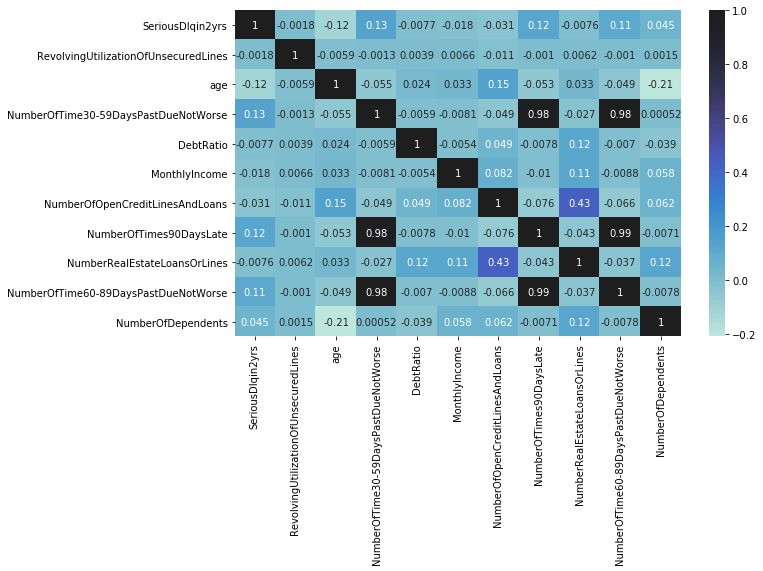

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, center=True);